In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


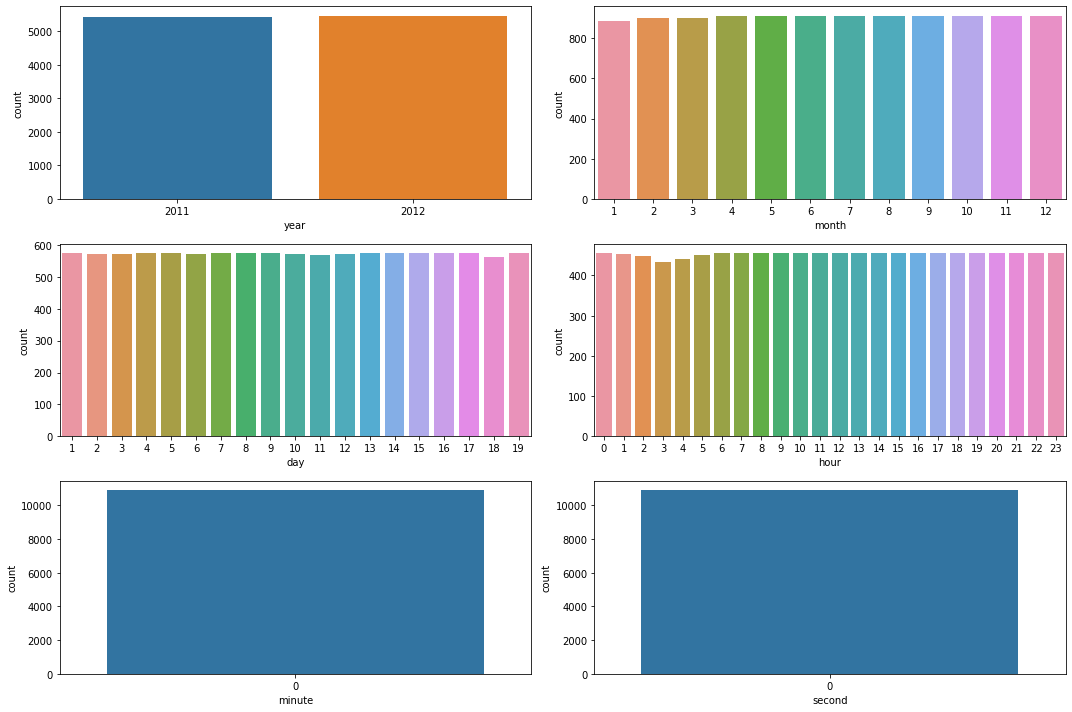

Mean Squared Error: 19985.171918720884
Root Mean Squared Error: 141.36892133252232


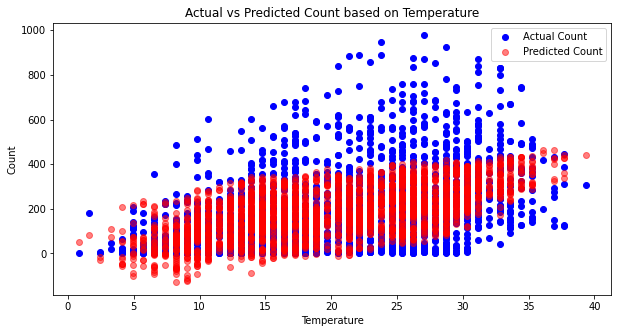

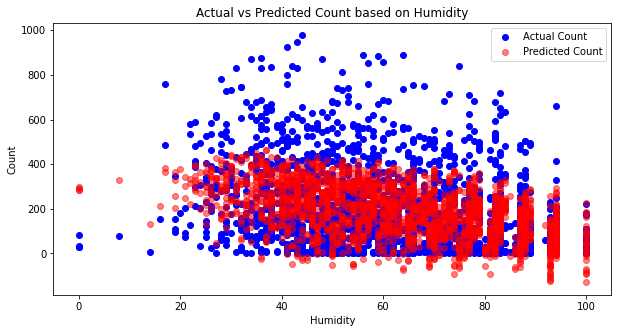

In [3]:

#1. Bring on the DATA
data = pd.read_csv('~/AIFFEL_quest_rs/Exploration/Ex01/train.csv')
data.head()

#2. Transform datatime, Make Columns

data['datetime'] = pd.to_datetime(data['datetime'])


data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

data.head()

#3. visualization

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.countplot(x='year', data=data, ax=axes[0, 0])
sns.countplot(x='month', data=data, ax=axes[0, 1])
sns.countplot(x='day', data=data, ax=axes[1, 0])
sns.countplot(x='hour', data=data, ax=axes[1, 1])
sns.countplot(x='minute', data=data, ax=axes[2, 0])
sns.countplot(x='second', data=data, ax=axes[2, 1])
plt.tight_layout()
plt.show()

#4. Saperate Data

X = data[['temp', 'humidity', 'season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour']]
y = data['count']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#5. Learning Model : Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

#6. Calculation and Put out Prediction Value  

#prediction value
y_pred = model.predict(X_test)

#lossfunction
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

#7. Visualization
# Visualize COUNT as a function of TEMP
plt.figure(figsize=(10, 5))
plt.scatter(X_test['temp'], y_test, color='blue', label='Actual Count')
plt.scatter(X_test['temp'], y_pred, color='red', alpha=0.5, label='Predicted Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Actual vs Predicted Count based on Temperature')
plt.legend()
plt.show()

# Visualize counts based on humidity
plt.figure(figsize=(10, 5))
plt.scatter(X_test['humidity'], y_test, color='blue', label='Actual Count')
plt.scatter(X_test['humidity'], y_pred, color='red', alpha=0.5, label='Predicted Count')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Actual vs Predicted Count based on Humidity')
plt.legend()
plt.show()